In [21]:
from IPython.display import HTML
#HTML for toggle
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [19]:
#forms
import os
path = 'testSet/Stimuli/Action/'
picnames = os.listdir(path)
import ipywidgets as widgets
un = widgets.Text(
    value='',
    placeholder='Enter Username',
    description='Username:',
    disabled=False
)
display(un)

acc = widgets.Text(
    value='',
    placeholder='Enter Account',
    description='Account:',
    disabled=False
)
display(acc)

Text(value='', description='Username:', placeholder='Enter Username')

Text(value='', description='Account:', placeholder='Enter Account')

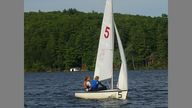

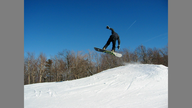

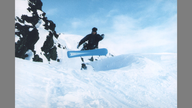

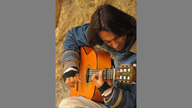

In [22]:
from PIL import Image
import random
import numpy as np
#random images
i1 = path+picnames[random.randint(0,np.shape(picnames)[0])]
i2 = path+picnames[random.randint(0,np.shape(picnames)[0])]
i3 = path+picnames[random.randint(0,np.shape(picnames)[0])]
i4 = path+picnames[random.randint(0,np.shape(picnames)[0])]
#resize proportionally
width, height = Image.open(i1).size
r1 = Image.open(i1).resize((int(width/10), int(height/10)), Image.ANTIALIAS)
r2 = Image.open(i2).resize((int(width/10), int(height/10)), Image.ANTIALIAS)
r3 = Image.open(i3).resize((int(width/10), int(height/10)), Image.ANTIALIAS)
r4 = Image.open(i4).resize((int(width/10), int(height/10)), Image.ANTIALIAS)
display(r1)
display(r2)
display(r3)
display(r4)

In [25]:
import string
#generate password from letters
password = ''.join(random.choices(string.ascii_uppercase, k=4))
print('your password is : ' + password)

your password is : HNER


In [26]:
#generating log for convenience in testing
import pandas as pd
import time
ts = time.time()
import datetime
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
import pickle
save = pickle.load(open('save.p', 'rb'))
data = [un.value, acc.value, password, i1, i2, i3, i4, 0, 0, st]
data = np.reshape(data, (1,10))
log = pd.DataFrame(data, columns = ['username', 'account', 'password', 'i1', 'i2', 'i3', 'i4', 'attempts', 'correct', 'updated'])
log = log.append(save, ignore_index=True)
pickle.dump(log, open( "save.p", "wb" ) )
log

,account,attempts,correct,i1,i2,i3,i4,password,updated,username
0,smith,0,0,testSet/Stimuli/Action/086.jpg,testSet/Stimuli/Action/090.jpg,testSet/Stimuli/Action/092.jpg,testSet/Stimuli/Action/172.jpg,HNER,2018-04-06 13:30:17,john
1,bing,3,1,testSet/Stimuli/Action/152.jpg,testSet/Stimuli/Action/116.jpg,testSet/Stimuli/Action/188.jpg,testSet/Stimuli/Action/042.jpg,A97I,2018-04-06 13:07:15,Allan
2,phone pin,NaN,NaN,testSet/Stimuli/Action/042.jpg,testSet/Stimuli/Action/150.jpg,testSet/Stimuli/Action/102.jpg,testSet/Stimuli/Action/080.jpg,E208,NaN,Sasha
3,phone pin,NaN,NaN,testSet/Stimuli/Action/140.jpg,testSet/Stimuli/Action/032.jpg,testSet/Stimuli/Action/046.jpg,testSet/Stimuli/Action/004.jpg,4VUH,NaN,Sasha


In [27]:
#forms for testing
tun = widgets.Text(
    value='',
    placeholder='Enter Username',
    description='Username:',
    disabled=False
)
display(tun)

tacc = widgets.Text(
    value='',
    placeholder='Enter Account',
    description='Account:',
    disabled=False
)
display(tacc)

Text(value='', description='Username:', placeholder='Enter Username')

Text(value='', description='Account:', placeholder='Enter Account')

In [29]:
#current in progress visible for convenience in testing
save = pickle.load(open('save.p', 'rb'))
df = save.loc[(save['username'] == tun.value) & (save['account'] == tacc.value)]
df


,account,attempts,correct,i1,i2,i3,i4,password,updated,username
0,smith,0,0,testSet/Stimuli/Action/086.jpg,testSet/Stimuli/Action/090.jpg,testSet/Stimuli/Action/092.jpg,testSet/Stimuli/Action/172.jpg,HNER,2018-04-06 13:30:17,john


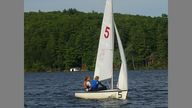

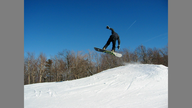

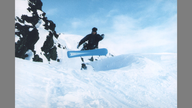

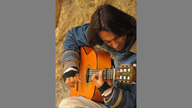

In [30]:
#retrive associated images with account
if(np.shape(df)[0]>1):
    df = df.iloc[0]
    
r1 = Image.open(df['i1'].iloc[0]).resize((int(width/10), int(height/10)), Image.ANTIALIAS)
r2 = Image.open(df['i2'].iloc[0]).resize((int(width/10), int(height/10)), Image.ANTIALIAS)
r3 = Image.open(df['i3'].iloc[0]).resize((int(width/10), int(height/10)), Image.ANTIALIAS)
r4 = Image.open(df['i4'].iloc[0]).resize((int(width/10), int(height/10)), Image.ANTIALIAS)
display(r1)
display(r2)
display(r3)
display(r4)

In [31]:
#form for password check
tpass = widgets.Text(
    value='',
    placeholder='Enter Password',
    description='Password:',
    disabled=False
)
display(tpass)

Text(value='', description='Password:', placeholder='Enter Password')

In [35]:
#print message and mark attempts ie successes and failures
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
if(tpass.value == df['password'].iloc[0]):
    print('congrats you got it right')
    df['attempts'] = int(df['attempts'])+1
    df['correct'] = int(df['correct']) + 1
    df['updated'] = st
    save.loc[(save['username'] == tun.value) & (save['account'] == tacc.value)] = df
else:
    print('WRONG PASSWORD')
    df['attempts'] = int(df['attempts'])+1
    df['updated'] = st
    save.loc[(save['username'] == tun.value) & (save['account'] == tacc.value)] = df
    
pickle.dump(save, open( "save.p", "wb" ) )

congrats you got it right


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [37]:
#log file
save

,account,attempts,correct,i1,i2,i3,i4,password,updated,username
0,smith,3,3,testSet/Stimuli/Action/086.jpg,testSet/Stimuli/Action/090.jpg,testSet/Stimuli/Action/092.jpg,testSet/Stimuli/Action/172.jpg,HNER,2018-04-06 13:36:03,john
1,bing,3,1,testSet/Stimuli/Action/152.jpg,testSet/Stimuli/Action/116.jpg,testSet/Stimuli/Action/188.jpg,testSet/Stimuli/Action/042.jpg,A97I,2018-04-06 13:07:15,Allan
2,phone pin,NaN,NaN,testSet/Stimuli/Action/042.jpg,testSet/Stimuli/Action/150.jpg,testSet/Stimuli/Action/102.jpg,testSet/Stimuli/Action/080.jpg,E208,NaN,Sasha
3,phone pin,NaN,NaN,testSet/Stimuli/Action/140.jpg,testSet/Stimuli/Action/032.jpg,testSet/Stimuli/Action/046.jpg,testSet/Stimuli/Action/004.jpg,4VUH,NaN,Sasha
